# CodSoft
### DataScience - Internship

##### Titanic Survival Prediction
##### by: Tamilvanan S

In [2]:
# import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter('ignore')

In [3]:
# load data from the local system
data = pd.read_csv("C:\\Users\\tamil\\Downloads\\Titanic-Dataset.csv")

In [4]:
# print few data 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# describtion about the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# checking for null values in the data
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# now we gonna change the data in columns [sex and Embarked] into columns of categorial integer
data.replace({'Sex':{'male':0,'female':1}},inplace=True)

In [8]:
data.replace({'Embarked':{'S':1,'C':2,'Q':3}},inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [9]:
# lets drop out 'Cabin' which isn't use in predicting model
data=data.drop(columns=['Cabin'])

# handling the missing values in data [Age and Embarked]
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Text(0.5, 1.0, 'survived count according to sex')

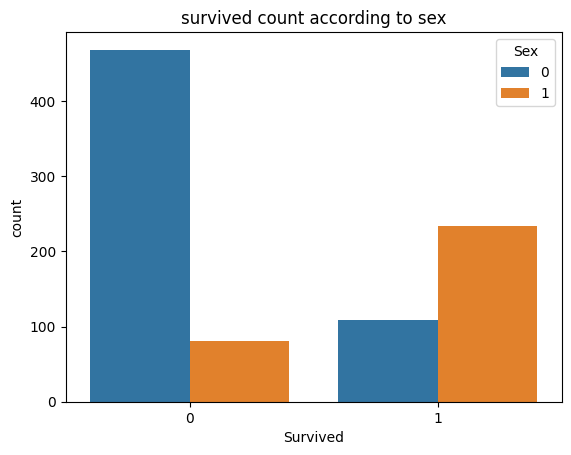

In [10]:
# visualizing survived count according to sex
sb.countplot(data,x='Survived',hue='Sex')
plt.title("survived count according to sex")

# here the 0 - Male and 1 - Female

Text(0.5, 1.0, 'survived count according to Embarked')

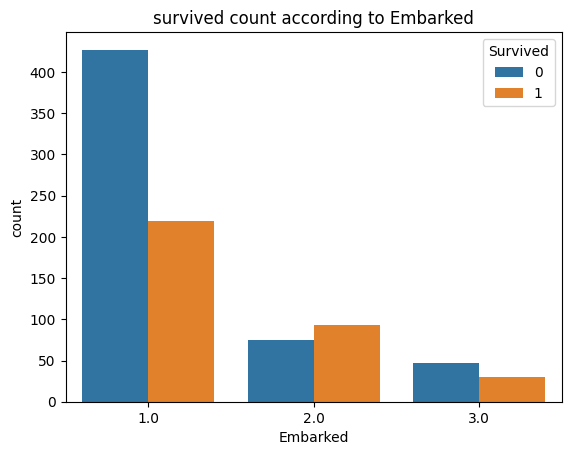

In [11]:
# visualizing survived count according to embarked
sb.countplot(data,x='Embarked',hue='Survived')
plt.title("survived count according to Embarked")

# here the 0 - Not Survived and 1 - Survived

Text(0.5, 1.0, 'survived count according to Pclass')

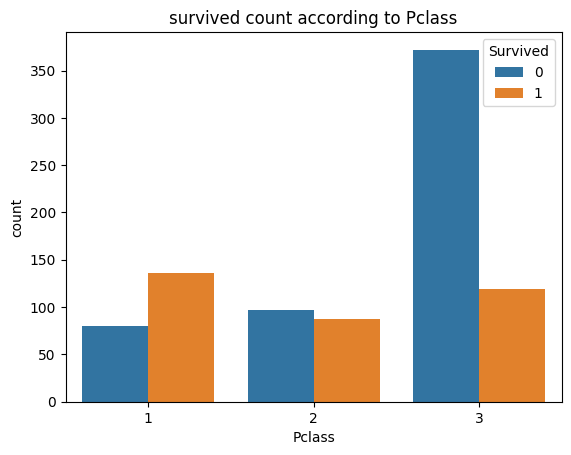

In [12]:
# visualizing survived count according to pclass
sb.countplot(data,x='Pclass',hue='Survived')
plt.title("survived count according to Pclass")

# here the 0 - Not Survived and 1 - Survived

In [14]:
# split loaded data into x and y
X = data.drop(columns=['PassengerId','Name','Ticket','Survived'])
Y = data['Survived']

In [15]:
# spliting the data loaded into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [16]:
# inspecting the shape of the training and testing data
print("Shape X_train",X_train.shape)
print("Shape X_test",X_test.shape)
print("Shape Y_train",Y_train.shape)
print("Shape Y_test",Y_test.shape)

Shape X_train (623, 7)
Shape X_test (268, 7)
Shape Y_train (623,)
Shape Y_test (268,)


In [17]:
# creating the Logistic model
from sklearn.linear_model import LogisticRegression

model_logre = LogisticRegression()

# fitting the model
model_logre.fit(X_train,Y_train)

#predicting the model
pred_logre = model_logre.predict(X_test)

In [18]:
# creating svm model - support vector machine
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')

# fitting the model
model_svm.fit(X_train,Y_train)

#predicting the model
pred_svm = model_svm.predict(X_test)

In [19]:
# creating svm model - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=100)

# fitting the model
model_rfc.fit(X_train,Y_train)

#predicting the model
pred_rfc = model_rfc.predict(X_test)

In [20]:
# inspecting the accuracy of the model
from sklearn.metrics import accuracy_score

acc_score_logre = accuracy_score(Y_test,pred_logre)
acc_score_svm = accuracy_score(Y_test,pred_svm)
acc_score_rfc = accuracy_score(Y_test,pred_rfc)

print("Accuracy of Logistic Regression :",acc_score_logre)
print("Accuracy of Support Vector Machine :",acc_score_svm)
print("Accuracy of Random Forest Classifier :",acc_score_rfc)

Accuracy of Logistic Regression : 0.8059701492537313
Accuracy of Support Vector Machine : 0.7910447761194029
Accuracy of Random Forest Classifier : 0.7947761194029851
